# Flattened dT analysis
Full combinatorics

In [42]:
# System tools  
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Python stack 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

# Internal modules 
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load

# pyutils 
from pyutils.pyplot import Plot
plotter = Plot() # just use this for styles

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Load data

In [43]:
!ls -ltrh ../../output/dt/

total 0
drwxr-sr-x  3 sgrant  staff    96B Dec  2 13:56 cosmic
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:00 test
drwxr-sr-x  4 sgrant  staff   128B Dec  4 16:38 a
drwxr-sr-x  4 sgrant  staff   128B Dec  5 12:57 b


In [44]:
!ls -ltrh ../../output/dt/
!ls -ltrh ../../output/dt/b/data
# !ls -ltrh ../../output/dt/a/data/

total 0
drwxr-sr-x  3 sgrant  staff    96B Dec  2 13:56 cosmic
drwxr-sr-x  3 sgrant  staff    96B Dec  2 14:00 test
drwxr-sr-x  4 sgrant  staff   128B Dec  4 16:38 a
drwxr-sr-x  4 sgrant  staff   128B Dec  5 12:57 b
total 0
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:32 CRY_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:36 CRY_mix2BB_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:40 CE_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:43 CE_mix2BB_onspill-LH_aw
total 0
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:32 CRY_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:36 CRY_mix2BB_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:40 CE_onspill-LH_aw
drwxr-sr-x  6 sgrant  staff   192B Dec  5 12:43 CE_mix2BB_onspill-LH_aw


In [45]:
run = "b"
base_in_path = Path(f"../../output/dt/{run}/data/")

# Load both test datasets
cry_path = base_in_path / "CRY_onspill-LH_aw/"
ce_mix2bb_path = base_in_path / "CE_mix2BB_onspill-LH_aw/"

print(f"Loading CRY data from: {cry_path}")
cry_data = Load(in_path=cry_path).load_pkl()["events"]

print(f"Loading CE Mix2BB data from: {ce_mix2bb_path}")
ce_mix_data = Load(in_path=ce_mix2bb_path).load_pkl()["events"]

print(f"CRY events: {len(cry_data)}")
print(f"CE mix2BB events: {len(ce_mix_data)}")

Loading CRY data from: ../../output/dt/b/data/CRY_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/b/data/CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/b/data/CRY_onspill-LH_aw/results.pkl
Loading CE Mix2BB data from: ../../output/dt/b/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/b/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/b/data/CE_mix2BB_onspill-LH_aw/results.pkl
CRY events: 23727
CE mix2BB events: 2139827
[Load] ✅ Successfully loaded results from ../../output/dt/b/data/CE_mix2BB_onspill-LH_aw/results.pkl
CRY events: 23727
CE mix2BB events: 2139827


In [46]:
## Add duration
cry_data["duration"] = cry_data["timeEnd"] - cry_data["timeStart"]
ce_mix_data["duration"] = ce_mix_data["timeEnd"] - ce_mix_data["timeStart"]

In [47]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(cry_data, n_events=2)
printer.print_n_events(ce_mix_data, n_events=2)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 2 event(s)...

-------------------------------------------------------------------------------------
event: 432092.0
subrun: 138.0
run: 1202.0
dT: 25.092216857882704
crv_x: -2579.938720703125
crv_y: -1084.8433837890625
crv_z: -4211.4677734375
PEs: 773.97998046875
nHits: 16.0
nLayers: 4.0
angle: -0.3257749080657959
timeStart: 978.054443359375
timeEnd: 1065.554443359375
crv_time: 962.8444213867188
sector: 1.0
PEs_per_hit: 48.373748779296875
t0: 987.9366382446015
d0: 90.30242156982422
tanDip: 0.831006646156311
maxr: 659.7584228515625
mom_mag: 151.07118225097656
duration: 87.5
-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------
event: 432092.0
subrun: 138.0
run: 1202.0
dT: 48.638054260226454
crv_x: 2583.90966796875
crv_y: 2065.89892578125
crv_z: -5973.38525390625
PEs: 821.08459472



## Convert to DataFrames

In [48]:
# Convert awkward arrays to DataFrame
df_cry = ak.to_dataframe(cry_data)
df_ce_mix = ak.to_dataframe(ce_mix_data)

## Time start/end cut 

reoptimisation for MDC2020aw

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/b/h1_2x2_start_end_time.png
	Wrote ../../output/images/dt/b/h1_2x2_start_end_time.png


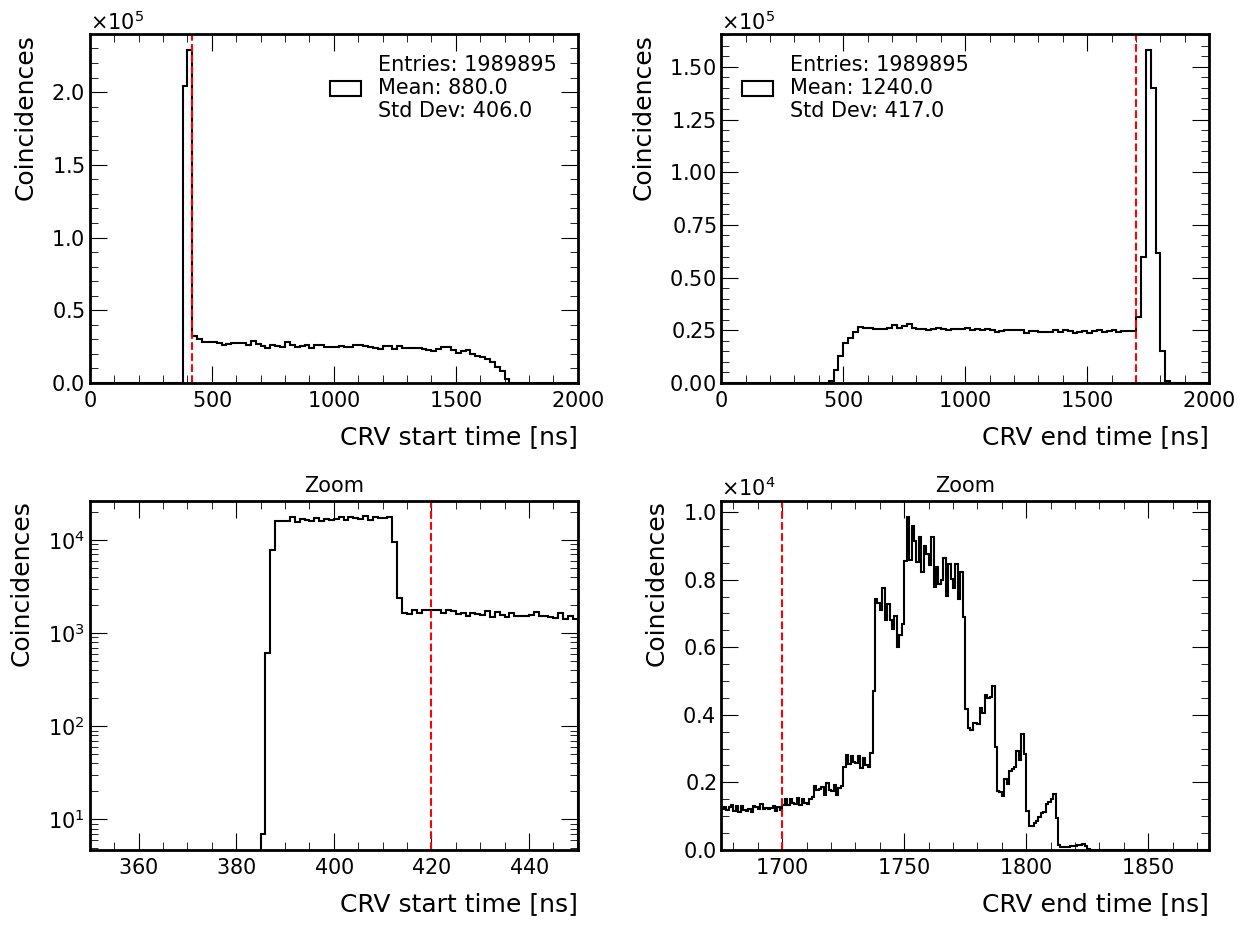

In [49]:
from pyutils.pyplot import Plot 

plotter = Plot()
fig, ax = plt.subplots(2, 2, figsize=(2*6.4, 2*4.8))

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,0],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,1],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
   
)

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=350,
    xmax=450,
    show=False,
    ax=ax[1,0],
    log_y=True,
    title="Zoom",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False   
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=200,  
    xmin=1675,
    xmax=1875,
    show=False,
    ax=ax[1,1],
    # log_y=True,
    title="Zoom",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False     
)

ax[0,0].axvline(420, linestyle="--")
ax[0,1].axvline(1700, linestyle="--")

ax[1,0].axvline(420, linestyle="--")
ax[1,1].axvline(1700, linestyle="--")


plt.tight_layout()
img_base_path = Path(f"../../output/images/dt/{run}/")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name = img_base_path / "h1_2x2_start_end_time.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

	Wrote ../../output/images/dt/b/h1o_1x2_start_end_time_cut.png


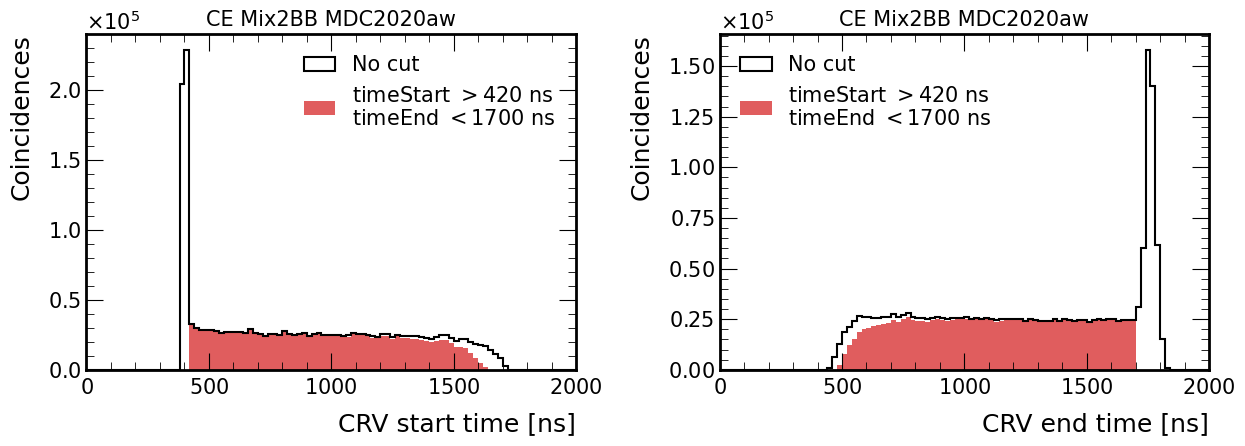

In [50]:
# Apply cut 
condition = ((df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700))

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles = {
    "No cut" : {
        "color": "black",
        "linestyle": "-"
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : {
        "color": "red",
        "histtype": "stepfilled",
        "alpha": 0.75
    },  

}

styles = {
    "No cut": {
        "color": "black",
        "linestyle": "-",
        "linewidth": 1.5,  # Make baseline more visible
        "zorder": 3  # Draw on top
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns": {
        "color": "#d62728",  # Slightly better red
        "histtype": "stepfilled",
        "alpha": 0.75,  # Slightly more transparent
        "edgecolor": "darkred",  # Add edge for definition
        "linewidth": 1.0,
        "zorder": 2
    },  
}

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeStart"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeStart"][condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeEnd"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeEnd"][condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[1],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
)

plt.tight_layout()

out_name = img_base_path / "h1o_1x2_start_end_time_cut.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

In [51]:
def get_start_end_cut_impact(df, condition, metric, dt_window=(-25, 150)):
    """
    Calculate deadtime or efficiency before and after applying a start/endtime condition.
    Returns a summary DataFrame with statistics.
    """
    dt_min, dt_max = dt_window

    def get_veto_stats(data, label):
        # Find unique (event, subrun) pairs
        total_events = set(zip(data['event'], data['subrun']))
        # Find events with at least one dT in window
        in_window = (data['dT'] >= dt_min) & (data['dT'] <= dt_max)
        passing_events = set(zip(data.loc[in_window, 'event'], data.loc[in_window, 'subrun']))
        fraction = len(passing_events) / len(total_events) if len(total_events) > 0 else 0
        return {
            'condition': label,
            'total_events': len(total_events),
            'passing_events': len(passing_events),
            f'{metric}_percent': fraction * 100
        }

    # Calculate statistics before and after cut
    stats_before = get_veto_stats(df, 'Before cut')
    stats_after = get_veto_stats(df[condition], 'After cut')

    # Add change row
    change = {
        'condition': 'Change',
        'total_events': stats_after['total_events'] - stats_before['total_events'],
        'passing_events': stats_after['passing_events'] - stats_before['passing_events'],
        f'{metric}_percent': stats_after[f'{metric}_percent'] - stats_before[f'{metric}_percent']
    }

    # Create summary DataFrame
    summary = pd.DataFrame([stats_before, stats_after, change])
    # print(f"Summary for metric: {metric}")
    # display(summary)
    return summary

# Example usage after function definition
condition1 = (df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700)
summary_ce_mix_1 = get_start_end_cut_impact(df_ce_mix, condition1, metric="deadtime")
summary_cry_1  = get_start_end_cut_impact(df_cry, condition1, metric="efficiency")
print("timeStart > 420 ns & timeEnd < 1700 ns")
print("="*70)
display(summary_ce_mix_1)
display(summary_cry_1)

results_base_path = Path(f"../../output/dt/{run}/results")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name_ce_mix = results_base_path / "summary_start_end_cut_ce_mix.csv" 
out_name_cry = results_base_path / "summary_start_end_cut_ce_mix.csv" 

summary_ce_mix_1.to_csv(out_name_ce_mix, index=False)
summary_cry_1.to_csv(out_name_cry, index=False)

print(f"\tWrote {out_name_ce_mix}")
print(f"\tWrote {out_name_cry}")
plt.show()



timeStart > 420 ns & timeEnd < 1700 ns


,condition,total_events,passing_events,deadtime_percent
0,Before cut,578372,179144,30.973837
1,After cut,403809,149941,37.131664
2,Change,-174563,-29203,6.157827


,condition,total_events,passing_events,efficiency_percent
0,Before cut,20087,20077,99.950217
1,After cut,13845,13837,99.942217
2,Change,-6242,-6240,-0.007999


	Wrote ../../output/dt/b/results/summary_start_end_cut_ce_mix.csv
	Wrote ../../output/dt/b/results/summary_start_end_cut_ce_mix.csv


## Apply start/end time cut 

In [52]:
# condition = (df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700)

# df_ce_mix_no_cut = df_ce_mix.copy(deep=True)
# df_cry_no_cut = df_cry.copy(deep=True)

# df_ce_mix = df_ce_mix[condition]
# df_cry = df_cry[condition]

## Scan dT

In [53]:
# Use ALL coincidences (no selection)
print(f"Using all coincidences:")
print(f"CRY: {len(df_cry):,} coincidences")
print(f"Mix2BB: {len(df_ce_mix):,} coincidences")
print(f"\nWill check if event is vetoed = has ANY coincidence in timing window")

Using all coincidences:
CRY: 23,727 coincidences
Mix2BB: 2,139,827 coincidences

Will check if event is vetoed = has ANY coincidence in timing window


In [54]:
def apply_dt_cut(df, dt_min, dt_max):
    """
    Apply dT timing window cut on event level.
    
    Fraction of events that pass
    """
    # Find rows where dT is within the window
    in_window = (df['dT'] >= dt_min) & (df['dT'] <= dt_max)
    
    # Get unique (event, subrun) pairs that have at least one dT in window
    pass_events = set(zip(df.loc[in_window, 'event'], df.loc[in_window, 'subrun']))
    
    # Get total unique events
    total_events = set(zip(df['event'], df['subrun']))
    
    # Calculate efficiency
    efficiency = len(pass_events) / len(total_events) if len(total_events) > 0 else 0
    
    return pass_events, efficiency

# Test the function
dt_min, dt_max = -25, 150
pass_events_cry, eff_cry = apply_dt_cut(df_cry, dt_min, dt_max)
pass_events_mix, eff_mix = apply_dt_cut(df_ce_mix, dt_min, dt_max)

print(f"dT window: [{dt_min}, {dt_max}] ns")
print(f"\nCRY:")
print(f"  Total events: {len(set(zip(df_cry['event'], df_cry['subrun']))):,}")
print(f"  Events passing: {len(pass_events_cry):,}")
print(f"  Efficiency: {eff_cry*100:.2f}%")

print(f"\nCE Mix2BB:")
print(f"  Total events: {len(set(zip(df_ce_mix['event'], df_ce_mix['subrun']))):,}")
print(f"  Events passing: {len(pass_events_mix):,}")
print(f"  Efficiency: {eff_mix*100:.2f}%")

# 99.980081
# 1	After cut	13782	13777	5	99.963721

dT window: [-25, 150] ns

CRY:
  Total events: 20,087
  Events passing: 20,077
  Efficiency: 99.95%

CE Mix2BB:
  Total events: 578,372
  Events passing: 179,144
  Efficiency: 30.97%


In [55]:
# Scan timing window ranges
print("Scanning timing windows...")

# Define ranges to scan
lower_bounds = np.arange(-50,15, 5) 
upper_bounds = np.arange(100, 205, 5) 

results = []
for dt_min in lower_bounds:
    for dt_max in upper_bounds:
        if dt_max <= dt_min:
            continue
        
        # Check if event is vetoed = has ANY coincidence in window
        # For CRY: want to veto (catch cosmics)
        cry_in_window = (df_cry['dT'] >= dt_min) & (df_cry['dT'] <= dt_max)
        cry_vetoed_events = df_cry[cry_in_window].groupby(['event', 'subrun']).size()
        cry_total_events = df_cry.groupby(['event', 'subrun']).size()
        eff_cry = len(cry_vetoed_events) / len(cry_total_events)
        
        # For CE Mix2BB: deadtime (fraction of events incorrectly vetoed)
        mix_in_window = (df_ce_mix['dT'] >= dt_min) & (df_ce_mix['dT'] <= dt_max)
        mix_vetoed_events = df_ce_mix[mix_in_window].groupby(['event', 'subrun']).size()
        mix_total_events = df_ce_mix.groupby(['event', 'subrun']).size()
        eff_mix = len(mix_vetoed_events) / len(mix_total_events)
        
        results.append({
            'dt_min': dt_min,
            'dt_max': dt_max,
            'width': dt_max - dt_min,
            'eff_cry': eff_cry * 100,
            'eff_mix': eff_mix * 100,
        })

df_scan = pd.DataFrame(results)
print(f"Scanned {len(df_scan)} window combinations")

# Find the minimum window width at 99.9% efficiency
df_99p9 = df_scan[df_scan['eff_cry'] >= 99.9].copy()
df_99p9['width'] = df_99p9['dt_max'] - df_99p9['dt_min']
min_width_idx = df_99p9['width'].idxmin()
optimal = df_99p9.loc[min_width_idx]
print(f"\nMinimum window at 99.9% CRY efficiency:")
print(f"  dt_min={optimal['dt_min']:.0f} ns, dt_max={optimal['dt_max']:.0f} ns")
print(f"  Width: {optimal['width']:.0f} ns")
print(f"  CRY efficiency: {optimal['eff_cry']:.2f}%")
print(f"  CE Mix2BB deadtime: {optimal['eff_mix']:.2f}%")

# Get baseline values
baseline = df_scan[(df_scan['dt_min'] == -25) & (df_scan['dt_max'] == 150)].iloc[0]

Scanning timing windows...
Scanned 273 window combinations

Minimum window at 99.9% CRY efficiency:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 30.09%
Scanned 273 window combinations

Minimum window at 99.9% CRY efficiency:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 30.09%


	Wrote ../../output/images/dt/b/h2_1x2_dt_eff_deadtime.png


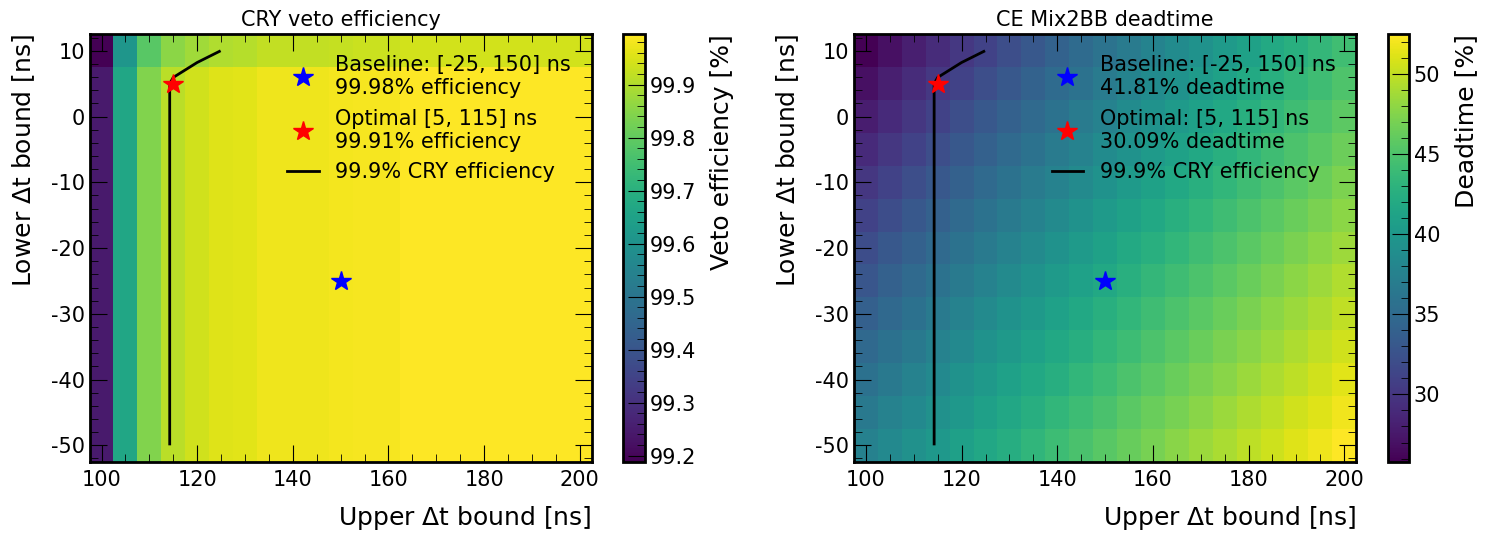

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(1.2*6.4*2, 1.2*4.8))

# CRY veto efficiency
pivot_cry = df_scan.pivot(index='dt_min', columns='dt_max', values='eff_cry')
im1 = axes[0].pcolormesh(pivot_cry.columns, pivot_cry.index, pivot_cry.values, cmap='viridis')
contour_cry = axes[0].contour(pivot_cry.columns, pivot_cry.index, pivot_cry.values, levels=[99.9], colors='black', linewidths=2)
axes[0].set_xlabel(r'Upper $\Delta t$ bound [ns]')
axes[0].set_ylabel(r'Lower $\Delta t$ bound [ns]')
axes[0].set_title('CRY veto efficiency')
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Veto efficiency [%]')
axes[0].plot(150, -25, marker='*', color="blue", markersize=15, linestyle='none', label=f'Baseline: [-25, 150] ns\n{baseline["eff_cry"]:.2f}% efficiency')
axes[0].plot(optimal['dt_max'], optimal['dt_min'], marker='*', color='red', markersize=15, linestyle='none', label=f'Optimal [{optimal["dt_min"]:.0f}, {optimal["dt_max"]:.0f}] ns\n{optimal["eff_cry"]:.2f}% efficiency')
axes[0].plot([], [], 'k-', linewidth=2, label='99.9% CRY efficiency')
axes[0].legend(loc="best")


# CE Mix2BB deadtime
pivot_mix = df_scan.pivot(index='dt_min', columns='dt_max', values='eff_mix')
im2 = axes[1].pcolormesh(pivot_mix.columns, pivot_mix.index, pivot_mix.values, cmap='viridis')
contour_mix = axes[1].contour(pivot_cry.columns, pivot_cry.index, pivot_cry.values, levels=[99.9], colors='black', linewidths=2)
axes[1].set_xlabel(r'Upper $\Delta t$ bound [ns]')
axes[1].set_ylabel(r'Lower $\Delta t$ bound [ns]')
axes[1].set_title('CE Mix2BB deadtime')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('Deadtime [%]')
axes[1].plot(150, -25, marker='*', color="blue", markersize=15, linestyle='none', label=f'Baseline: [-25, 150] ns\n{baseline["eff_mix"]:.2f}% deadtime')
axes[1].plot(optimal['dt_max'], optimal['dt_min'], marker='*', color='red', markersize=15, linestyle='none', label=f'Optimal: [{optimal["dt_min"]:.0f}, {optimal["dt_max"]:.0f}] ns\n{optimal["eff_mix"]:.2f}% deadtime')
axes[1].plot([], [], 'k-', linewidth=2, label='99.9% CRY efficiency')
axes[1].legend(loc="best")

plt.tight_layout()

img_base_path = Path(f"../../output/images/dt/{run}")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name = img_base_path / "h2_1x2_dt_eff_deadtime.png" 
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/b/h1_1x2_dT.png
	Wrote ../../output/images/dt/b/h1_1x2_dT.png


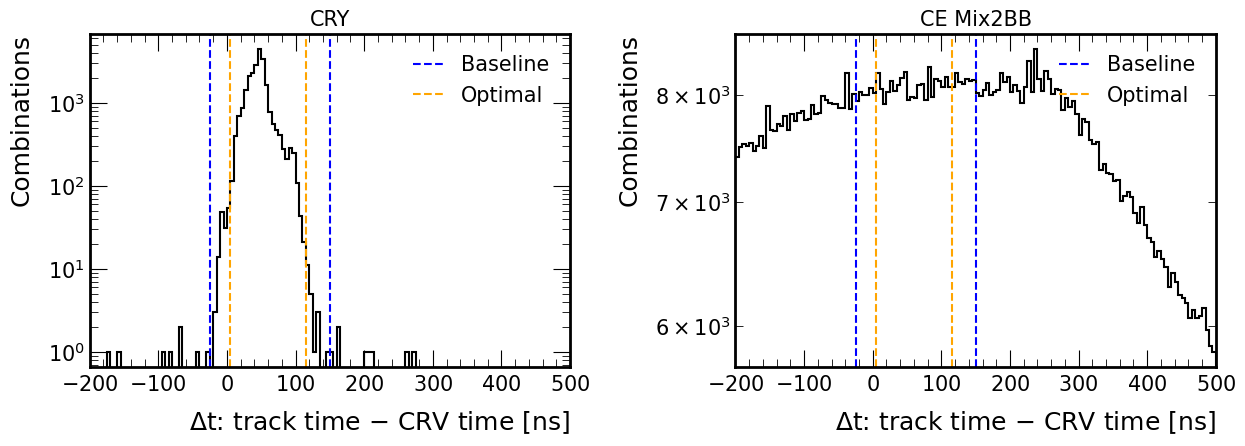

In [57]:
plotter = Plot()

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# CRY distribution
plotter.plot_1D( 
    df_cry['dT'].values,
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CRY",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

# CE Mix2BB distribution
plotter.plot_1D( 
    df_ce_mix['dT'].values,
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CE Mix2BB",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    # Baseline
    subplot.axvline(-25, linestyle="--", color="blue", label="Baseline")
    subplot.axvline(150, linestyle="--", color="blue")
    # Optimal
    subplot.axvline(optimal['dt_min'], linestyle="--", color="orange", label="Optimal")
    subplot.axvline(optimal['dt_max'], linestyle="--", color="orange")
    subplot.legend()

plt.tight_layout()
out_name = img_base_path / "h1_1x2_dT.png"
plt.savefig(out_name, dpi=300)

print(f"\tWrote {out_name}")
plt.show()


In [58]:
def get_central_dt(df, dt_min=-25, dt_max=150):
    """
    Get the dT value closest to the window center for each event.
    """
    window_center = (dt_min + dt_max) / 2
    df = df.copy()  # Avoid modifying original dataframe
    df['dist_to_center'] = np.abs(df['dT'] - window_center)
    
    # Get the central dT for each event
    central_dt_per_event = df.loc[df.groupby(['event', 'subrun'])['dist_to_center'].idxmin()][['event', 'subrun', 'dT']]
    central_dt_per_event = central_dt_per_event.rename(columns={'dT': 'central_dt'})
    
    # Merge back to add as column
    df = df.merge(central_dt_per_event, on=['event', 'subrun'], how='left')
    df = df.drop(columns=['dist_to_center'])
    
    return df

df_ce_mix = get_central_dt(df_ce_mix)
df_cry = get_central_dt(df_cry)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/dt/b/h1_dT_centdT_overlay.png
	Wrote ../../output/images/dt/b/h1_dT_centdT_overlay.png


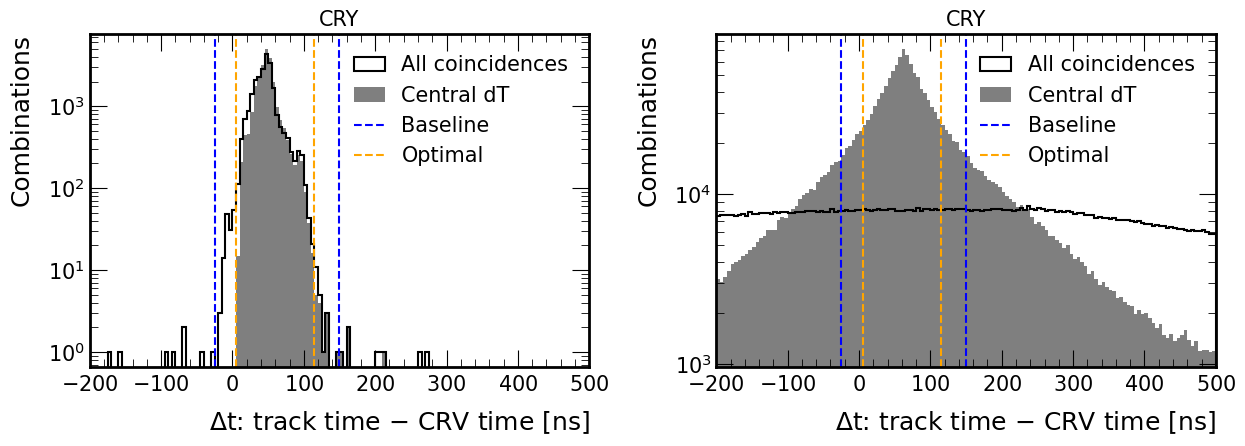

In [59]:
plotter = Plot()

# # Get central dT for CRY (one per event - closest to window center)
# window_center = (optimal['dt_min'] + optimal['dt_max']) / 2
# df_cry['dist_to_center'] = np.abs(df_cry['dT'] - window_center)
# central_dt_cry = df_cry.loc[df_cry.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT'].values

fig, ax = plt.subplots(1,2, figsize=(2*6.4, 4.8)) 

styles = {
    "All coincidences": {
        "color" : "black",
        "histtype" : "step"
    },
    "Central dT": {
        "color" : "black",
        "alpha" : 0.5,
        "histtype" : "stepfilled"
    }
}
# CRY: overlay all dT and central dT
plotter.plot_1D_overlay(
    {
        "All coincidences": df_cry['dT'].values,
        "Central dT": df_cry['central_dt'].values,
    },
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CRY",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    ax=ax[0],
    log_y=True,
    styles=styles
)

plotter.plot_1D_overlay(
    {
        "All coincidences": df_ce_mix['dT'].values,
        "Central dT": df_ce_mix['central_dt'].values,
    },
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"CRY",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    ax=ax[1],
    log_y=True,
    styles=styles
)

# Baseline
for i_ax in ax:
    i_ax.axvline(-25, linestyle="--", color="blue", label="Baseline")
    i_ax.axvline(150, linestyle="--", color="blue")
    # Optimal
    i_ax.axvline(optimal['dt_min'], linestyle="--", color="orange", label="Optimal")
    i_ax.axvline(optimal['dt_max'], linestyle="--", color="orange")
    i_ax.legend()

plt.tight_layout()
out_name = img_base_path / "h1_dT_centdT_overlay.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()


## Find events between -25 and 0 ns 

In [60]:
df_cry.groupby(['event', 'subrun'])
print(df_cry)

          event   subrun     run         dT        crv_x        crv_y  \
0      432092.0    138.0  1202.0  25.092217 -2579.938721 -1084.843384   
1      432092.0    138.0  1202.0  48.638054  2583.909668  2065.898926   
2      432092.0    138.0  1202.0  52.918877  3055.528076  2708.988770   
3      135058.0    693.0  1202.0  44.855231  -868.877014  2717.429688   
4      269937.0    761.0  1202.0   6.878798 -2579.528809 -1171.777100   
...         ...      ...     ...        ...          ...          ...   
23722  234872.0  81067.0  1202.0  27.866361  1296.613770  2708.671387   
23723  362224.0  81320.0  1202.0  31.452762   174.397873  2705.052979   
23724  385218.0  81343.0  1202.0  46.801869  -394.424622  2695.205811   
23725  485688.0  81652.0  1202.0  23.795698 -2578.377197 -1769.264038   
23726  485688.0  81652.0  1202.0  45.490400  2568.933838  1985.619507   

             crv_z          PEs  nHits  nLayers  ...     crv_time  sector  \
0     -4211.467773   773.979980   16.0      4.

In [61]:
cry_lo = cry_data[(cry_data['dT'] > -25) & (cry_data['dT'] < 0)] 

In [62]:
df = ak.to_dataframe(cry_lo)

In [63]:
# df.head()
df.to_csv("test.csv", index=False) 

In [64]:
condition = ((cry_data['dT'] < 0) & (cry_data['dT'] > -25))
condition2 = ak.any(condition, axis=-1)
condition2  

np.True_

In [65]:
ak.any(((cry_data['dT'] < 0) & (cry_data['dT'] > -25)), axis=-1)

np.True_

## Filter events with dT in [-25, 0] range

Create a DataFrame per unique event that contains all dTs for events where at least one dT falls in the range [-25, 0].

In [66]:
# Filter events that have at least one dT in the range [-25, 0]
# Work with the DataFrame (df_cry) which has event, subrun, dT columns

# Find (event, subrun) pairs that have at least one dT in the target range
dt_in_range_mask = (df_cry['dT'] < 0) & (df_cry['dT'] > -25)
events_with_target_dt = df_cry.loc[dt_in_range_mask, ['event', 'subrun']].drop_duplicates()

# Merge back to get all rows for those events (all dTs for each qualifying event)
df_filtered = df_cry.merge(events_with_target_dt, on=['event', 'subrun'], how='inner')

print(f"Original coincidences: {len(df_cry):,}")
print(f"Unique events in original: {df_cry.groupby(['event', 'subrun']).ngroups:,}")
print(f"\nEvents with at least one dT in [-25, 0]: {len(events_with_target_dt):,}")
print(f"Total coincidences for filtered events: {len(df_filtered):,}")

Original coincidences: 23,727
Unique events in original: 20,081

Events with at least one dT in [-25, 0]: 95
Total coincidences for filtered events: 198
Unique events in original: 20,081

Events with at least one dT in [-25, 0]: 95
Total coincidences for filtered events: 198


In [67]:
# Create a DataFrame with one row per event, containing all dTs as an array
df_events = df_filtered.groupby(['event', 'subrun'])['dT'].apply(list).reset_index()
df_events.columns = ['event', 'subrun', 'dT_array']

print(f"DataFrame with {len(df_events)} events")
print(df_events.head(10))

DataFrame with 95 events
     event   subrun                                           dT_array
0   4117.0  80884.0           [11.510548856916785, -8.214670869645715]
1  20836.0  17268.0            [9.357603993558541, -8.716004404878959]
2  28102.0  37133.0           [13.778081191182764, -7.575373398660986]
3  30313.0  48093.0          [-10.697883886910404, 17.287467675589596]
4  32006.0  36447.0           [12.756400879107332, -6.778511230267668]
5  38307.0  62391.0            [16.89957069669549, -7.041591412679509]
6  46504.0  52461.0  [54.466524170543266, -15.954374266956734, 11.1...
7  49017.0  28882.0           [-11.383291594609773, 9.369760163202727]
8  50015.0  41264.0           [-2.1776541468939286, 25.56050503279357]
9  56175.0  30541.0            [-11.47414118451752, 16.63071721391998]


In [68]:
df_events.to_csv("filtered_events_dT.csv", index=False)

In [69]:
# Calculate mean dT for all combinations and central dT
# Get central dT for CRY (one per event - closest to window center)
window_center = (optimal['dt_min'] + optimal['dt_max']) / 2
df_cry['dist_to_center'] = np.abs(df_cry['dT'] - window_center)
central_dt_cry = df_cry.loc[df_cry.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT'].values

# Calculate means
mean_all_combinations = df_cry['dT'].mean()
mean_central_dt = central_dt_cry.mean()

print(f"Mean dT (all combinations): {mean_all_combinations:.2f} ns")
print(f"Mean dT (central dT per event): {mean_central_dt:.2f} ns")
print(f"\nNumber of combinations: {len(df_cry):,}")
print(f"Number of unique events: {len(central_dt_cry):,}")

Mean dT (all combinations): 46.23 ns
Mean dT (central dT per event): 48.54 ns

Number of combinations: 23,727
Number of unique events: 20,081


In [70]:
# Check what sectorType values we have
print("Unique sectorType values in CRY data:")
print(sorted(df_cry['sector'].unique()))
print(f"\nValue counts:")
print(df_cry['sector'].value_counts().sort_index())

Unique sectorType values in CRY data:
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(nan), np.float64(6.0), np.float64(9.0)]

Value counts:
sector
1.0     4638
2.0     2134
3.0    16854
4.0       60
5.0        4
6.0        5
9.0       26
Name: count, dtype: int64


In [71]:
# Check available columns
print("Available columns in df_cry:")
print(df_cry.columns.tolist())
print("\nChecking if sectorType exists in raw cry_data:")
print(ak.fields(cry_data))

Available columns in df_cry:
['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration', 'central_dt', 'dist_to_center']

Checking if sectorType exists in raw cry_data:
['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration']


In [72]:
# Check sector values
print("Unique sector values in CRY data:")
print(sorted(df_cry['sector'].unique()))
print(f"\nValue counts:")
print(df_cry['sector'].value_counts().sort_index())

Unique sector values in CRY data:
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(nan), np.float64(6.0), np.float64(9.0)]

Value counts:
sector
1.0     4638
2.0     2134
3.0    16854
4.0       60
5.0        4
6.0        5
9.0       26
Name: count, dtype: int64


In [73]:
# Add sectorType column based on sector mapping
sector_type_map = {
    1.0: 'R',  # Right
    2.0: 'L',  # Left
    3.0: 'T',  # Top
    4.0: 'E',  # Extraction/end
    5.0: 'U',  # Upstream
    6.0: 'D',  # Downstream
    7.0: 'C',  # Cryo
    9.0: 'Unknown'  # Unknown
}

df_cry['sectorType'] = df_cry['sector'].map(sector_type_map)
df_ce_mix['sectorType'] = df_ce_mix['sector'].map(sector_type_map)

# Check distribution
print("CRY sectorType distribution:")
print(df_cry['sectorType'].value_counts().sort_index())
print(f"\nTotal CRY coincidences: {len(df_cry):,}")

CRY sectorType distribution:
sectorType
D              5
E             60
L           2134
R           4638
T          16854
U              4
Unknown       26
Name: count, dtype: int64

Total CRY coincidences: 23,727


In [74]:
# Check columns in both dataframes
print("df_cry columns:", df_cry.columns.tolist())
print("\ndf_ce_mix columns:", df_ce_mix.columns.tolist())

df_cry columns: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration', 'central_dt', 'dist_to_center', 'sectorType']

df_ce_mix columns: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration', 'central_dt', 'sectorType']


In [75]:
# Check if sector is in the raw ce_mix_data
print("Fields in ce_mix_data:", ak.fields(ce_mix_data))
print("\nFields in cry_data:", ak.fields(cry_data))

# Recreate df_ce_mix if sector is available
if 'sector' in ak.fields(ce_mix_data):
    df_ce_mix = ak.to_dataframe(ce_mix_data)
    print(f"\nRecreated df_ce_mix with {len(df_ce_mix)} rows")
    print("Columns:", df_ce_mix.columns.tolist())
else:
    print("\n'sector' not in ce_mix_data")

Fields in ce_mix_data: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration']

Fields in cry_data: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration']

Recreated df_ce_mix with 2139827 rows
Columns: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration']

Recreated df_ce_mix with 2139827 rows
Columns: ['event', 'subrun', 'run', 'dT', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits', 'nLayers', 'angle', 'timeStart', 'timeEnd', 'crv_time', 'sector', 'PEs_per_hit', 't0', 'd0', 'tanDip', 'maxr', 'mom_mag', 'duration']


In [76]:
# Add sectorType column based on sector mapping (only for CRY data)
sector_type_map = {
    1.0: 'R',  # Right
    2.0: 'L',  # Left
    3.0: 'T',  # Top
    4.0: 'E',  # Extraction/end
    5.0: 'U',  # Upstream
    6.0: 'D',  # Downstream
    7.0: 'C',  # Cryo
    9.0: 'Unknown'  # Unknown
}

df_cry['sectorType'] = df_cry['sector'].map(sector_type_map)

# Check distribution
print("CRY sectorType distribution:")
print(df_cry['sectorType'].value_counts().sort_index())
print(f"\nTotal CRY coincidences: {len(df_cry):,}")
print("\nNote: CE Mix2BB data does not have sector information")

CRY sectorType distribution:
sectorType
D              5
E             60
L           2134
R           4638
T          16854
U              4
Unknown       26
Name: count, dtype: int64

Total CRY coincidences: 23,727

Note: CE Mix2BB data does not have sector information


In [77]:
# Calculate mean dT by sectorType
# For all combinations
mean_by_sector_all = df_cry.groupby('sectorType')['dT'].agg(['mean', 'std', 'count']).sort_index()
mean_by_sector_all.columns = ['mean_dT_all', 'std_dT_all', 'n_combinations']

# For central dT (one per event)
# Get central dT for each event
window_center = (optimal['dt_min'] + optimal['dt_max']) / 2
df_cry['dist_to_center'] = np.abs(df_cry['dT'] - window_center)

# Get one central dT per event with its sectorType
central_df = df_cry.loc[df_cry.groupby(['event', 'subrun'])['dist_to_center'].idxmin()][['event', 'subrun', 'dT', 'sectorType']]
mean_by_sector_central = central_df.groupby('sectorType')['dT'].agg(['mean', 'std', 'count']).sort_index()
mean_by_sector_central.columns = ['mean_dT_central', 'std_dT_central', 'n_events']

# Combine results
summary_by_sector = pd.concat([mean_by_sector_all, mean_by_sector_central], axis=1)
print("Mean dT by sectorType:")
print("="*80)
display(summary_by_sector)

Mean dT by sectorType:


,mean_dT_all,std_dT_all,n_combinations,mean_dT_central,std_dT_central,n_events
sectorType,,,,,,
D,35.871732,81.289327,5,123.407244,NaN,1
E,64.676800,5.935152,60,64.375903,3.978455,48
L,38.639029,18.673448,2134,47.307008,11.528139,1010
R,39.365374,19.778864,4638,48.197968,15.109411,2531
T,48.940259,16.801633,16854,48.592615,16.172196,16481
U,78.317326,86.678140,4,28.724017,NaN,1
Unknown,93.033428,7.280822,26,91.226749,7.768398,9


[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Plotting sectorTypes with >= 50 combinations: ['E', 'L', 'R', 'T']
	Wrote ../../output/images/dt/b/h1o_1x2_dT_by_sectorType.png
	Wrote ../../output/images/dt/b/h1o_1x2_dT_by_sectorType.png


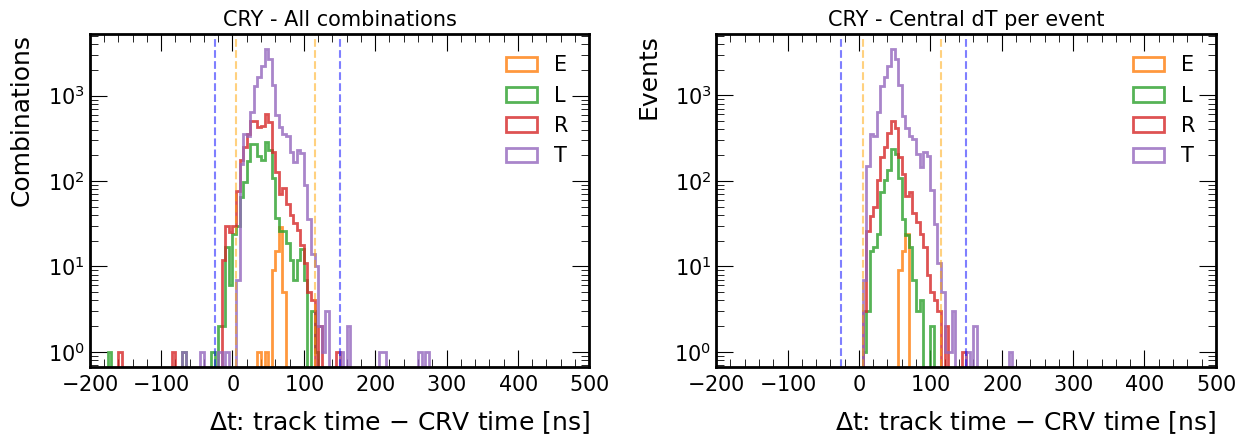

In [78]:
# Create histograms by sectorType
plotter = Plot()

# Filter out sectors with very few events (< 50 combinations)
min_combinations = 50
major_sectors = df_cry.groupby('sectorType').size()
major_sectors = major_sectors[major_sectors >= min_combinations].index.tolist()

print(f"Plotting sectorTypes with >= {min_combinations} combinations: {major_sectors}")

# Define colors for each sector type
sector_colors = {
    'D': '#1f77b4',  # Blue
    'E': '#ff7f0e',  # Orange
    'L': '#2ca02c',  # Green
    'R': '#d62728',  # Red
    'T': '#9467bd',  # Purple
    'U': '#8c564b',  # Brown
    'Unknown': '#7f7f7f',  # Gray
}

# Plot 1: All combinations by sectorType
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

# Prepare data dictionary and styles for all combinations
data_all = {}
styles_all = {}
for sector in major_sectors:
    data_all[sector] = df_cry[df_cry['sectorType'] == sector]['dT'].values
    styles_all[sector] = {
        'color': sector_colors.get(sector, 'black'),
        'histtype': 'step',
        'linewidth': 2,
        'alpha': 0.8
    }

plotter.plot_1D_overlay(
    data_all,
    nbins=140,
    xmin=-200,
    xmax=500,
    title="CRY - All combinations",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel="Combinations",
    show=False,
    ax=ax[0],
    log_y=True,
    styles=styles_all
)

# Plot 2: Central dT by sectorType
data_central = {}
styles_central = {}
for sector in major_sectors:
    sector_central = central_df[central_df['sectorType'] == sector]['dT'].values
    if len(sector_central) > 0:
        data_central[sector] = sector_central
        styles_central[sector] = {
            'color': sector_colors.get(sector, 'black'),
            'histtype': 'step',
            'linewidth': 2,
            'alpha': 0.8
        }

plotter.plot_1D_overlay(
    data_central,
    nbins=140,
    xmin=-200,
    xmax=500,
    title="CRY - Central dT per event",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel="Events",
    show=False,
    ax=ax[1],
    log_y=True,
    styles=styles_central
)

# Add window markers to both plots
for i_ax in [0, 1]:
    ax[i_ax].axvline(-25, linestyle="--", color="blue", alpha=0.5)
    ax[i_ax].axvline(150, linestyle="--", color="blue", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_min'], linestyle="--", color="orange", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_max'], linestyle="--", color="orange", alpha=0.5)

plt.tight_layout()
out_name = img_base_path / "h1o_1x2_dT_by_sectorType.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()

In [79]:
# Investigate sector=9 (Unknown) events
sector_9_df = df_cry[df_cry['sector'] == 9.0]
print(f"Found {len(sector_9_df)} coincidences with sector=9")
print(f"Unique events: {sector_9_df.groupby(['event', 'subrun']).ngroups}")
print("\nDetails of sector=9 coincidences:")
print(sector_9_df[['event', 'subrun', 'dT', 'sector', 'crv_x', 'crv_y', 'crv_z', 'PEs', 'nHits']].to_string())

Found 26 coincidences with sector=9
Unique events: 26

Details of sector=9 coincidences:
          event   subrun          dT  sector        crv_x        crv_y        crv_z          PEs  nHits
848    107738.0    979.0   90.454008     9.0 -3263.294189  1429.380249  3837.399902   712.430298   10.0
1074   178818.0  77119.0   98.716931     9.0 -3259.993896  2144.332764  3562.399902  1090.851440    9.0
1097   103913.0  78148.0   74.164449     9.0 -3269.698486  2041.462036  3562.399902   967.181946   10.0
1390   379716.0   3928.0  101.916530     9.0 -3257.612793  2503.518555  3562.399902   952.420166    9.0
1501    57978.0   4621.0   93.094711     9.0 -3263.195801  2279.182373  3562.399902   930.277466    8.0
1536   395690.0   3943.0   98.675357     9.0 -3260.069336  1598.721924  3562.399902   822.826904   10.0
4099   456607.0  15112.0   90.067474     9.0 -3259.611816  2095.440430  3562.399902   819.278992    8.0
4956   462091.0  20196.0   89.874703     9.0 -3261.280762  2224.675293  3562.39

In [80]:
# # Plot spatial distribution of all sectors
# fig = plt.figure(figsize=(15, 10))

# # Create 3D subplot for 3D view
# ax1 = fig.add_subplot(2, 3, 1, projection='3d')

# # Create 2D projections
# ax2 = fig.add_subplot(2, 3, 2)  # x-y view
# ax3 = fig.add_subplot(2, 3, 3)  # x-z view
# ax4 = fig.add_subplot(2, 3, 5)  # y-z view

# # Color map for sectors
# sector_colors_map = {
#     1.0: '#d62728',  # R - Red
#     2.0: '#2ca02c',  # L - Green
#     3.0: '#9467bd',  # T - Purple
#     4.0: '#ff7f0e',  # E - Orange
#     5.0: '#8c564b',  # U - Brown
#     6.0: '#1f77b4',  # D - Blue
#     7.0: '#e377c2',  # C - Pink
#     9.0: '#000000',  # Unknown - Black
# }

# sector_labels = {
#     1.0: 'R (Right)',
#     2.0: 'L (Left)',
#     3.0: 'T (Top)',
#     4.0: 'E (Extraction)',
#     5.0: 'U (Upstream)',
#     6.0: 'D (Downstream)',
#     7.0: 'C (Cryo)',
#     9.0: 'Unknown',
# }

# # Plot each sector
# for sector in sorted(df_cry['sector'].dropna().unique()):
#     sector_data = df_cry[df_cry['sector'] == sector]
#     color = sector_colors_map.get(sector, 'gray')
#     label = sector_labels.get(sector, f'Sector {int(sector)}')
    
#     # 3D plot
#     ax1.scatter(sector_data['crv_x'], sector_data['crv_y'], sector_data['crv_z'], 
#                 c=color, label=label, alpha=0.6, s=10)
    
#     # 2D projections
#     ax2.scatter(sector_data['crv_x'], sector_data['crv_y'], c=color, label=label, alpha=0.6, s=10)
#     ax3.scatter(sector_data['crv_x'], sector_data['crv_z'], c=color, label=label, alpha=0.6, s=10)
#     ax4.scatter(sector_data['crv_y'], sector_data['crv_z'], c=color, label=label, alpha=0.6, s=10)

# # 3D plot formatting
# ax1.set_xlabel('CRV X [mm]')
# ax1.set_ylabel('CRV Y [mm]')
# ax1.set_zlabel('CRV Z [mm]')
# ax1.set_title('3D View - All Sectors')
# ax1.legend(loc='upper left', fontsize=8)

# # x-y view
# ax2.set_xlabel('CRV X [mm]')
# ax2.set_ylabel('CRV Y [mm]')
# ax2.set_title('X-Y View')
# ax2.grid(True, alpha=0.3)
# ax2.set_aspect('equal', adjustable='box')

# # x-z view
# ax3.set_xlabel('CRV X [mm]')
# ax3.set_ylabel('CRV Z [mm]')
# ax3.set_title('X-Z View')
# ax3.grid(True, alpha=0.3)
# ax3.set_aspect('equal', adjustable='box')

# # y-z view
# ax4.set_xlabel('CRV Y [mm]')
# ax4.set_ylabel('CRV Z [mm]')
# ax4.set_title('Y-Z View')
# ax4.grid(True, alpha=0.3)
# ax4.set_aspect('equal', adjustable='box')

# plt.tight_layout()
# out_name = img_base_path / "scatter_3d_sectors_spatial.png"
# plt.savefig(out_name, dpi=300)
# print(f"\tWrote {out_name}")
# plt.show()

	Wrote ../../output/images/dt/b/scatter_3d_sectors_spatial.png


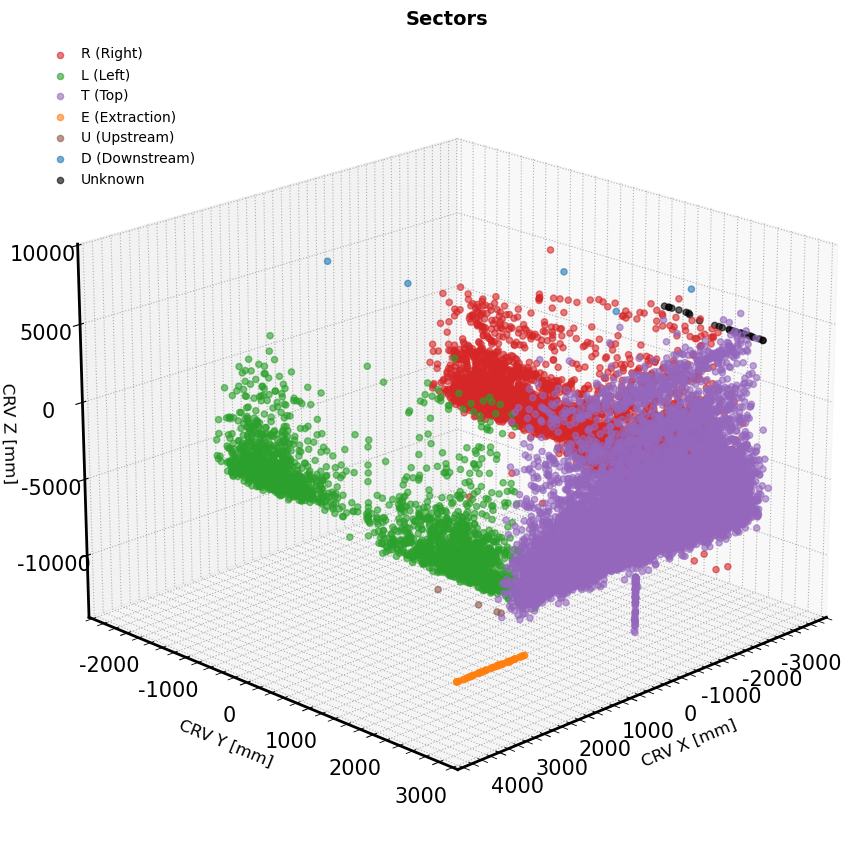

In [81]:
# Plot spatial distribution of all sectors in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Color map for sectors
sector_colors_map = {
    1.0: '#d62728',  # R - Red
    2.0: '#2ca02c',  # L - Green
    3.0: '#9467bd',  # T - Purple
    4.0: '#ff7f0e',  # E - Orange
    5.0: '#8c564b',  # U - Brown
    6.0: '#1f77b4',  # D - Blue
    7.0: '#e377c2',  # C - Pink
    9.0: '#000000',  # Unknown - Black
}

sector_labels = {
    1.0: 'R (Right)',
    2.0: 'L (Left)',
    3.0: 'T (Top)',
    4.0: 'E (Extraction)',
    5.0: 'U (Upstream)',
    6.0: 'D (Downstream)',
    7.0: 'C (Cryo)',
    9.0: 'Unknown',
}

# Plot each sector
for sector in sorted(df_cry['sector'].dropna().unique()):
    sector_data = df_cry[df_cry['sector'] == sector]
    color = sector_colors_map.get(sector, 'gray')
    label = sector_labels.get(sector, f'Sector {int(sector)}')
    
    ax.scatter(sector_data['crv_x'], sector_data['crv_y'], sector_data['crv_z'], 
               c=color, label=label, alpha=0.6, s=20)

# Formatting
ax.set_xlabel('CRV X [mm]', fontsize=12)
ax.set_ylabel('CRV Y [mm]', fontsize=12)
ax.set_zlabel('CRV Z [mm]', fontsize=12)
ax.set_title('Sectors', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)

# Set viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
out_name = img_base_path / "scatter_3d_sectors_spatial.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()

	Wrote ../../output/images/dt/b/scatter_3d_sectors_spatial.png


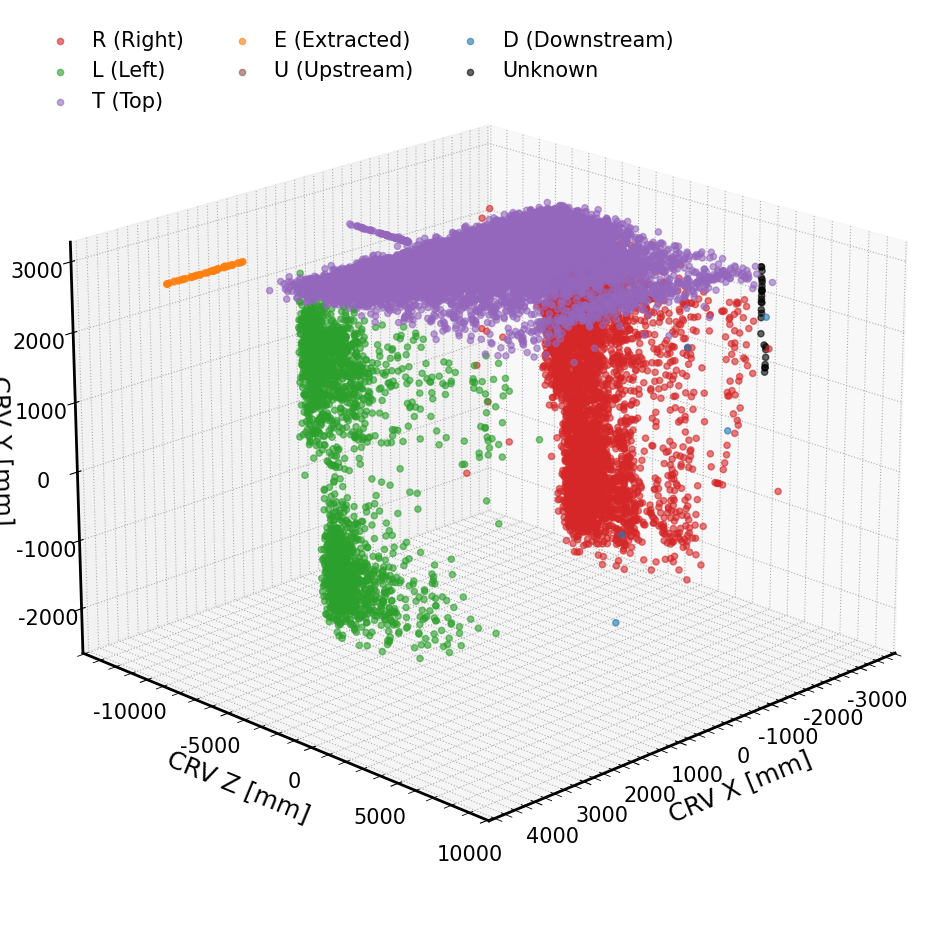

In [82]:
# Plot spatial distribution of all sectors in 3D
fig = plt.figure(figsize=(2*6.4, 2*4.8))
ax = fig.add_subplot(111, projection='3d')

# Color map for sectors
sector_colors_map = {
    1.0: '#d62728',  # R - Red
    2.0: '#2ca02c',  # L - Green
    3.0: '#9467bd',  # T - Purple
    4.0: '#ff7f0e',  # E - Orange
    5.0: '#8c564b',  # U - Brown
    6.0: '#1f77b4',  # D - Blue
    7.0: '#e377c2',  # C - Pink
    9.0: '#000000',  # Unknown - Black
}

sector_labels = {
    1.0: 'R (Right)',
    2.0: 'L (Left)',
    3.0: 'T (Top)',
    4.0: 'E (Extracted)',
    5.0: 'U (Upstream)',
    6.0: 'D (Downstream)',
    7.0: 'C (Cryo)',
    9.0: 'Unknown',
}

# Plot each sector (swap y and z so y is vertical)
for sector in sorted(df_cry['sector'].dropna().unique()):
    sector_data = df_cry[df_cry['sector'] == sector]
    color = sector_colors_map.get(sector, 'gray')
    label = sector_labels.get(sector, f'Sector {int(sector)}')
    
    ax.scatter(sector_data['crv_x'], sector_data['crv_z'], sector_data['crv_y'], 
               c=color, label=label, alpha=0.6, s=20)

# Formatting
ax.set_xlabel('CRV X [mm]')
ax.set_ylabel('CRV Z [mm]')
ax.set_zlabel('CRV Y [mm]')
# ax.set_title('CRV Sectors') # , fontweight='bold')
ax.legend(loc='upper left', ncols=3)

# Set viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()
out_name = img_base_path / "scatter_3d_sectors_spatial.png"
plt.savefig(out_name, dpi=300)
print(f"\tWrote {out_name}")
plt.show()

In [83]:

# Compare central_dT distributions before and after start/end time cut

# First, let's recalculate without the cut using the full dataset
df_cry_no_cut = ak.to_dataframe(cry_data)
df_ce_mix_no_cut = ak.to_dataframe(ce_mix_data)

# Add duration
df_cry_no_cut["duration"] = df_cry_no_cut["timeEnd"] - df_cry_no_cut["timeStart"]
df_ce_mix_no_cut["duration"] = df_ce_mix_no_cut["timeEnd"] - df_ce_mix_no_cut["timeStart"]

# Get central dT for NO CUT case
window_center = (optimal['dt_min'] + optimal['dt_max']) / 2
df_cry_no_cut['dist_to_center'] = np.abs(df_cry_no_cut['dT'] - window_center)
central_dt_no_cut = df_cry_no_cut.loc[df_cry_no_cut.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT']

# Apply the cut
condition = (df_cry_no_cut["timeStart"] > 420) & (df_cry_no_cut["timeEnd"] < 1700)
df_cry_with_cut = df_cry_no_cut[condition].copy()

# Get central dT for WITH CUT case
df_cry_with_cut['dist_to_center'] = np.abs(df_cry_with_cut['dT'] - window_center)
central_dt_with_cut = df_cry_with_cut.loc[df_cry_with_cut.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT']

print("Central dT Statistics:")
print("="*70)
print(f"\nNO CUT (full dataset):")
print(f"  Mean: {central_dt_no_cut.mean():.2f} ns")
print(f"  Std:  {central_dt_no_cut.std():.2f} ns")
print(f"  N events: {len(central_dt_no_cut):,}")

print(f"\nWITH CUT (timeStart > 420 & timeEnd < 1700):")
print(f"  Mean: {central_dt_with_cut.mean():.2f} ns")
print(f"  Std:  {central_dt_with_cut.std():.2f} ns")
print(f"  N events: {len(central_dt_with_cut):,}")

print(f"\nDifference:")
print(f"  Mean change: {central_dt_with_cut.mean() - central_dt_no_cut.mean():.2f} ns")
print(f"  Std change:  {central_dt_with_cut.std() - central_dt_no_cut.std():.2f} ns")


Central dT Statistics:

NO CUT (full dataset):
  Mean: 48.54 ns
  Std:  15.87 ns
  N events: 20,081

WITH CUT (timeStart > 420 & timeEnd < 1700):
  Mean: 48.72 ns
  Std:  15.91 ns
  N events: 19,641

Difference:
  Mean change: 0.18 ns
  Std change:  0.04 ns


[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


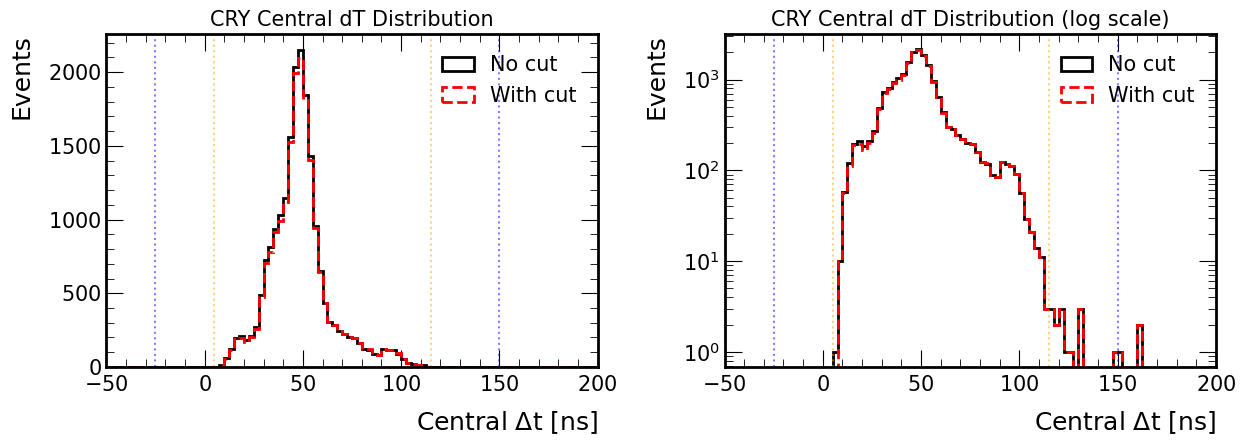


Conclusion: The central_dT distributions are nearly identical!
The std deviation difference is only 0.04 ns (15.87 vs 15.91 ns)


In [84]:

# Plot comparison of central_dT distributions
from pyutils.pyplot import Plot

plotter = Plot()
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles = {
    "No cut": {
        "color": "black",
        "histtype": "step",
        "linewidth": 2,
        "label": f"No cut\nMean: {central_dt_no_cut.mean():.1f} ns\nStd: {central_dt_no_cut.std():.1f} ns\nN: {len(central_dt_no_cut):,}"
    },
    "With cut": {
        "color": "red",
        "histtype": "step",
        "linewidth": 2,
        "linestyle": "--",
        "label": f"With cut\nMean: {central_dt_with_cut.mean():.1f} ns\nStd: {central_dt_with_cut.std():.1f} ns\nN: {len(central_dt_with_cut):,}"
    }
}

# Linear scale
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_no_cut.values,
        "With cut": central_dt_with_cut.values
    },
    nbins=100,
    xmin=-50,
    xmax=200,
    title="CRY Central dT Distribution",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[0],
    styles=styles,
    log_y=False
)

# Log scale for better comparison
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_no_cut.values,
        "With cut": central_dt_with_cut.values
    },
    nbins=100,
    xmin=-50,
    xmax=200,
    title="CRY Central dT Distribution (log scale)",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[1],
    styles=styles,
    log_y=True
)

# Add baseline and optimal windows
for i_ax in [0, 1]:
    ax[i_ax].axvline(-25, linestyle=":", color="blue", alpha=0.5, label="Baseline")
    ax[i_ax].axvline(150, linestyle=":", color="blue", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_min'], linestyle=":", color="orange", alpha=0.5, label="Optimal")
    ax[i_ax].axvline(optimal['dt_max'], linestyle=":", color="orange", alpha=0.5)

plt.tight_layout()
plt.show()

print("\nConclusion: The central_dT distributions are nearly identical!")
print("The std deviation difference is only 0.04 ns (15.87 vs 15.91 ns)")


In [85]:

# Now check CE Mix2BB - this is where the problem might be!

# Get central dT for CE Mix2BB NO CUT case
df_ce_mix_no_cut['dist_to_center'] = np.abs(df_ce_mix_no_cut['dT'] - window_center)
central_dt_ce_no_cut = df_ce_mix_no_cut.loc[df_ce_mix_no_cut.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT']

# Apply the cut to CE Mix2BB
condition_ce = (df_ce_mix_no_cut["timeStart"] > 420) & (df_ce_mix_no_cut["timeEnd"] < 1700)
df_ce_mix_with_cut = df_ce_mix_no_cut[condition_ce].copy()

# Get central dT for WITH CUT case
df_ce_mix_with_cut['dist_to_center'] = np.abs(df_ce_mix_with_cut['dT'] - window_center)
central_dt_ce_with_cut = df_ce_mix_with_cut.loc[df_ce_mix_with_cut.groupby(['event', 'subrun'])['dist_to_center'].idxmin()]['dT']

print("CE Mix2BB Central dT Statistics:")
print("="*70)
print(f"\nNO CUT (full dataset):")
print(f"  Mean: {central_dt_ce_no_cut.mean():.2f} ns")
print(f"  Std:  {central_dt_ce_no_cut.std():.2f} ns")
print(f"  N events: {len(central_dt_ce_no_cut):,}")

print(f"\nWITH CUT (timeStart > 420 & timeEnd < 1700):")
print(f"  Mean: {central_dt_ce_with_cut.mean():.2f} ns")
print(f"  Std:  {central_dt_ce_with_cut.std():.2f} ns")
print(f"  N events: {len(central_dt_ce_with_cut):,}")

print(f"\nDifference:")
print(f"  Mean change: {central_dt_ce_with_cut.mean() - central_dt_ce_no_cut.mean():.2f} ns")
print(f"  Std change:  {central_dt_ce_with_cut.std() - central_dt_ce_no_cut.std():.2f} ns")


CE Mix2BB Central dT Statistics:

NO CUT (full dataset):
  Mean: 67.82 ns
  Std:  271.89 ns
  N events: 428,440

WITH CUT (timeStart > 420 & timeEnd < 1700):
  Mean: 80.83 ns
  Std:  292.02 ns
  N events: 403,809

Difference:
  Mean change: 13.02 ns
  Std change:  20.13 ns


TypeError: Plot.plot_1D_overlay() got an unexpected keyword argument 'stat_box'

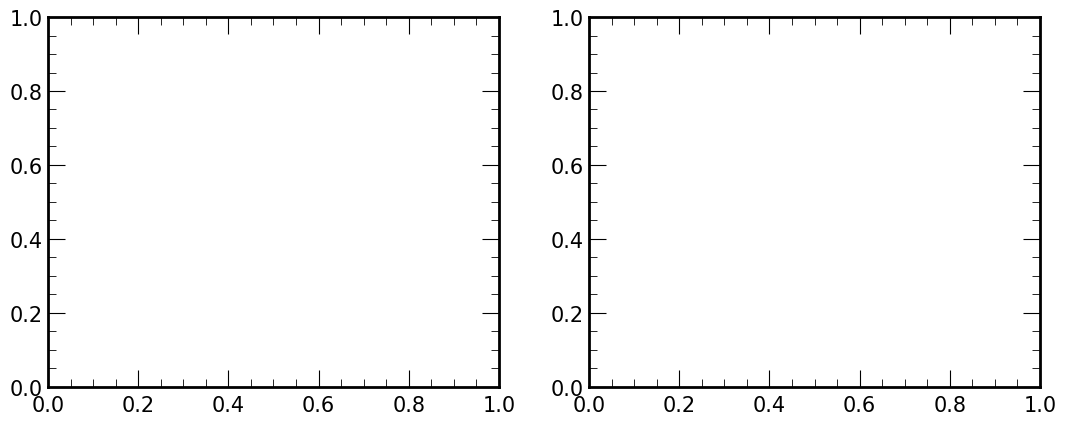

In [86]:

# Plot CE Mix2BB central_dT comparison
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles_ce = {
    "No cut": {
        "color": "black",
        "histtype": "step",
        "linewidth": 2,
    },
    "With cut": {
        "color": "red",
        "histtype": "step",
        "linewidth": 2,
        "linestyle": "--",
    }
}

# Linear scale
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_ce_no_cut.values,
        "With cut": central_dt_ce_with_cut.values
    },
    nbins=100,
    xmin=-200,
    xmax=500,
    title=f"CE Mix2BB Central dT\nNo cut: μ={central_dt_ce_no_cut.mean():.1f}, σ={central_dt_ce_no_cut.std():.1f} | With cut: μ={central_dt_ce_with_cut.mean():.1f}, σ={central_dt_ce_with_cut.std():.1f}",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[0],
    styles=styles_ce,
    log_y=False,
    stat_box=False
)

# Log scale
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_ce_no_cut.values,
        "With cut": central_dt_ce_with_cut.values
    },
    nbins=100,
    xmin=-200,
    xmax=500,
    title="CE Mix2BB Central dT (log scale)",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[1],
    styles=styles_ce,
    log_y=True,
    stat_box=False
)

# Add baseline and optimal windows
for i_ax in [0, 1]:
    ax[i_ax].axvline(-25, linestyle=":", color="blue", alpha=0.5)
    ax[i_ax].axvline(150, linestyle=":", color="blue", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_min'], linestyle=":", color="orange", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_max'], linestyle=":", color="orange", alpha=0.5)

plt.tight_layout()
plt.show()

print("\nProblem identified!")
print("The start/end time cut is removing events preferentially from certain dT regions")
print("This creates a BIASED sample that doesn't represent the true dT distribution")


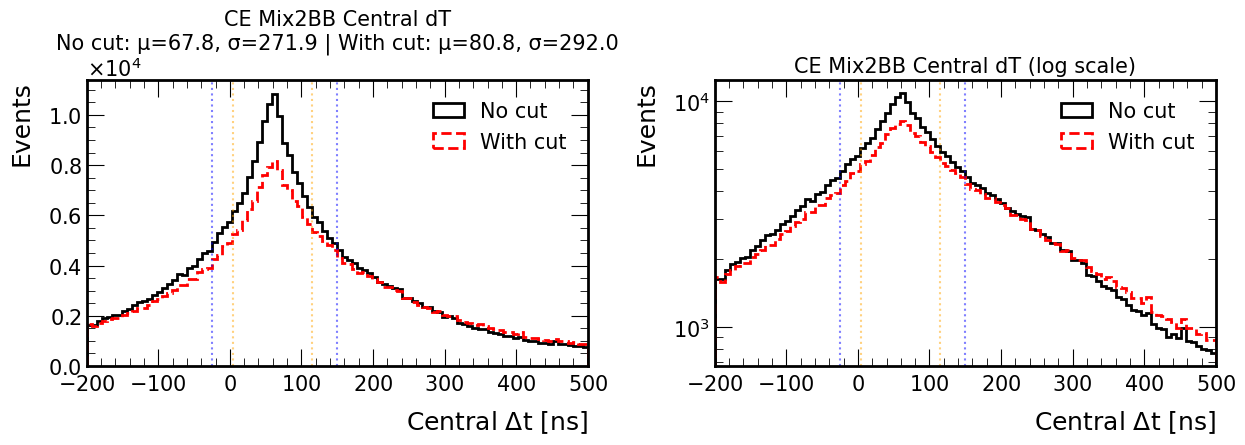


Problem identified!
The start/end time cut is removing events preferentially from certain dT regions
This creates a BIASED sample that doesn't represent the true dT distribution


In [87]:

# Plot CE Mix2BB central_dT comparison (without stat_box parameter)
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles_ce = {
    "No cut": {
        "color": "black",
        "histtype": "step",
        "linewidth": 2,
    },
    "With cut": {
        "color": "red",
        "histtype": "step",
        "linewidth": 2,
        "linestyle": "--",
    }
}

# Linear scale
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_ce_no_cut.values,
        "With cut": central_dt_ce_with_cut.values
    },
    nbins=100,
    xmin=-200,
    xmax=500,
    title=f"CE Mix2BB Central dT\nNo cut: μ={central_dt_ce_no_cut.mean():.1f}, σ={central_dt_ce_no_cut.std():.1f} | With cut: μ={central_dt_ce_with_cut.mean():.1f}, σ={central_dt_ce_with_cut.std():.1f}",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[0],
    styles=styles_ce,
    log_y=False
)

# Log scale
plotter.plot_1D_overlay(
    {
        "No cut": central_dt_ce_no_cut.values,
        "With cut": central_dt_ce_with_cut.values
    },
    nbins=100,
    xmin=-200,
    xmax=500,
    title="CE Mix2BB Central dT (log scale)",
    xlabel=r"Central $\Delta t$ [ns]",
    ylabel="Events",
    show=False,
    ax=ax[1],
    styles=styles_ce,
    log_y=True
)

# Add baseline and optimal windows
for i_ax in [0, 1]:
    ax[i_ax].axvline(-25, linestyle=":", color="blue", alpha=0.5)
    ax[i_ax].axvline(150, linestyle=":", color="blue", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_min'], linestyle=":", color="orange", alpha=0.5)
    ax[i_ax].axvline(optimal['dt_max'], linestyle=":", color="orange", alpha=0.5)

plt.tight_layout()
plt.show()

print("\nProblem identified!")
print("The start/end time cut is removing events preferentially from certain dT regions")
print("This creates a BIASED sample that doesn't represent the true dT distribution")


In [88]:

# Investigate which dT values are being preferentially removed
# Find events that are REMOVED by the cut
removed_events = set(zip(df_ce_mix_no_cut['event'], df_ce_mix_no_cut['subrun'])) - set(zip(df_ce_mix_with_cut['event'], df_ce_mix_with_cut['subrun']))
print(f"Events removed by cut: {len(removed_events):,}")
print(f"Events remaining after cut: {len(set(zip(df_ce_mix_with_cut['event'], df_ce_mix_with_cut['subrun']))):,}")

# Get the central dT for removed events
df_ce_mix_no_cut['is_removed'] = df_ce_mix_no_cut.apply(lambda row: (row['event'], row['subrun']) in removed_events, axis=1)

# Get central dT for removed events
central_dt_removed = df_ce_mix_no_cut[df_ce_mix_no_cut['is_removed']].groupby(['event', 'subrun']).apply(
    lambda x: x.loc[(x['dT'] - window_center).abs().idxmin(), 'dT']
).values

print(f"\nCentral dT for REMOVED events:")
print(f"  Mean: {central_dt_removed.mean():.2f} ns")
print(f"  Std:  {central_dt_removed.std():.2f} ns")
print(f"  N: {len(central_dt_removed):,}")

print(f"\nCentral dT for KEPT events:")
print(f"  Mean: {central_dt_ce_with_cut.mean():.2f} ns")
print(f"  Std:  {central_dt_ce_with_cut.std():.2f} ns")
print(f"  N: {len(central_dt_ce_with_cut):,}")


Events removed by cut: 174,563
Events remaining after cut: 403,809

Central dT for REMOVED events:
  Mean: -10.87 ns
  Std:  502.85 ns
  N: 24,631

Central dT for KEPT events:
  Mean: 80.83 ns
  Std:  292.02 ns
  N: 403,809

Central dT for REMOVED events:
  Mean: -10.87 ns
  Std:  502.85 ns
  N: 24,631

Central dT for KEPT events:
  Mean: 80.83 ns
  Std:  292.02 ns
  N: 403,809


In [89]:

# Run the dT optimization WITH the start/end time cut applied
print("Running dT optimization WITH start/end time cut...")
print("="*70)

# Apply the cut
condition_cry = (df_cry_no_cut["timeStart"] > 420) & (df_cry_no_cut["timeEnd"] < 1700)
condition_ce = (df_ce_mix_no_cut["timeStart"] > 420) & (df_ce_mix_no_cut["timeEnd"] < 1700)

df_cry_cut = df_cry_no_cut[condition_cry].copy()
df_ce_mix_cut = df_ce_mix_no_cut[condition_ce].copy()

print(f"After cut:")
print(f"  CRY: {len(df_cry_cut):,} coincidences")
print(f"  CE Mix2BB: {len(df_ce_mix_cut):,} coincidences")

# Scan timing window ranges (same as before)
lower_bounds = np.arange(-50, 15, 5) 
upper_bounds = np.arange(100, 205, 5) 

results_with_cut = []
for dt_min in lower_bounds:
    for dt_max in upper_bounds:
        if dt_max <= dt_min:
            continue
        
        # CRY efficiency
        cry_in_window = (df_cry_cut['dT'] >= dt_min) & (df_cry_cut['dT'] <= dt_max)
        cry_vetoed_events = df_cry_cut[cry_in_window].groupby(['event', 'subrun']).size()
        cry_total_events = df_cry_cut.groupby(['event', 'subrun']).size()
        eff_cry = len(cry_vetoed_events) / len(cry_total_events)
        
        # CE Mix2BB deadtime
        mix_in_window = (df_ce_mix_cut['dT'] >= dt_min) & (df_ce_mix_cut['dT'] <= dt_max)
        mix_vetoed_events = df_ce_mix_cut[mix_in_window].groupby(['event', 'subrun']).size()
        mix_total_events = df_ce_mix_cut.groupby(['event', 'subrun']).size()
        eff_mix = len(mix_vetoed_events) / len(mix_total_events)
        
        results_with_cut.append({
            'dt_min': dt_min,
            'dt_max': dt_max,
            'width': dt_max - dt_min,
            'eff_cry': eff_cry * 100,
            'eff_mix': eff_mix * 100,
        })

df_scan_with_cut = pd.DataFrame(results_with_cut)

# Find optimal window at 99.9% efficiency
df_99p9_with_cut = df_scan_with_cut[df_scan_with_cut['eff_cry'] >= 99.9].copy()
df_99p9_with_cut['width'] = df_99p9_with_cut['dt_max'] - df_99p9_with_cut['dt_min']
min_width_idx_with_cut = df_99p9_with_cut['width'].idxmin()
optimal_with_cut = df_99p9_with_cut.loc[min_width_idx_with_cut]

print(f"\nOptimal window WITH start/end cut:")
print(f"  dt_min={optimal_with_cut['dt_min']:.0f} ns, dt_max={optimal_with_cut['dt_max']:.0f} ns")
print(f"  Width: {optimal_with_cut['width']:.0f} ns")
print(f"  CRY efficiency: {optimal_with_cut['eff_cry']:.2f}%")
print(f"  CE Mix2BB deadtime: {optimal_with_cut['eff_mix']:.2f}%")

print(f"\nOptimal window WITHOUT start/end cut (from before):")
print(f"  dt_min={optimal['dt_min']:.0f} ns, dt_max={optimal['dt_max']:.0f} ns")
print(f"  Width: {optimal['width']:.0f} ns")
print(f"  CRY efficiency: {optimal['eff_cry']:.2f}%")
print(f"  CE Mix2BB deadtime: {optimal['eff_mix']:.2f}%")

print("\n" + "="*70)
print("COMPARISON:")
print("="*70)
print(f"Window width change: {optimal_with_cut['width']:.0f} - {optimal['width']:.0f} = {optimal_with_cut['width'] - optimal['width']:.0f} ns")
print(f"Deadtime change: {optimal_with_cut['eff_mix']:.2f}% - {optimal['eff_mix']:.2f}% = {optimal_with_cut['eff_mix'] - optimal['eff_mix']:.2f}%")


Running dT optimization WITH start/end time cut...
After cut:
  CRY: 23,145 coincidences
  CE Mix2BB: 1,406,582 coincidences
After cut:
  CRY: 23,145 coincidences
  CE Mix2BB: 1,406,582 coincidences

Optimal window WITH start/end cut:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 26.06%

Optimal window WITHOUT start/end cut (from before):
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 30.09%

COMPARISON:
Window width change: 110 - 110 = 0 ns
Deadtime change: 26.06% - 30.09% = -4.03%

Optimal window WITH start/end cut:
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 26.06%

Optimal window WITHOUT start/end cut (from before):
  dt_min=5 ns, dt_max=115 ns
  Width: 110 ns
  CRY efficiency: 99.91%
  CE Mix2BB deadtime: 30.09%

COMPARISON:
Window width change: 110 - 110 = 0 ns
Deadtime change: 26.06% - 30.09% = -4.03%
